In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy.interpolate import interp1d
import importlib

from source import plots
from source import prob_dists as pd


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
n = 0
importlib.reload(pd)
importlib.reload(plots)
params = {'R_G': 220, # Kpc
          'd_solar': 8.5, # kpc
          'psi': 180,
          'M_min': 1.0e-2, # Msun
          'M_max': 1.0e10, # Msun
          'fwimp': 1.0,
          'mean_params': {'a':77.4, 'b':0.87+0.31*n, 'c':-0.23-0.04*n},
          'nside': 2048,
          'area_fermi': 2000.0, # cm^2
          'n': n,
          'log_flux_min': -15, # log10 photons/cm^2/yr
          'log_flux_max': -5, # log10 photons/cm^2/yr
          'N': 7500,
          'log_k_min': 3,
#           'log_k_min': 2,
          'log_k_max': 9,
#           'log_k_max': 6.5,
          'N_k': 100000,
          'psh_log_f_min': -8.5,
#           'psh_log_f_min': -4.5,
          'psh_log_f_max': -4.7,
#           'psh_log_f_max': -4,
          'N_psh': 1000
         }

params['omega_pixel'] = 4.*np.pi/(12*params['nside']**2.) # sr
p = params

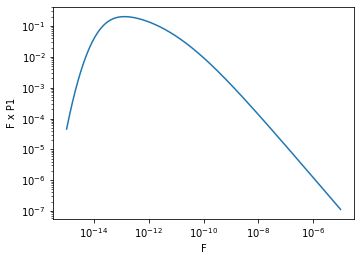

In [27]:
fluxes = np.logspace(p['log_flux_min'], p['log_flux_max'], num=p['N'])
p1_vals = pd.p1(fluxes, **p)
fig, _ = plots.check_fp1_plot(fluxes, p1_vals)

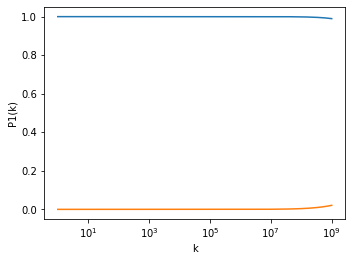

In [28]:
muu = pd.mu(**p)
ft_p1_vals, k = pd.ft_p1(p1_vals, fluxes, **p)
fig, _ = plots.check_ft_p1_plot(k, ft_p1_vals)

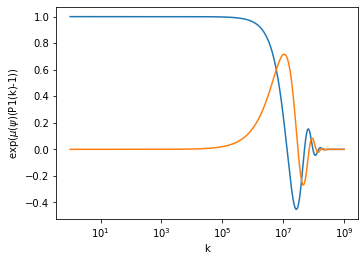

In [29]:
fig, _ = plots.check_psh_integrand_plot(k, ft_p1_vals, muu)

In [30]:
pf_vals, flux = pd.pf(muu, ft_p1_vals, k, **p)

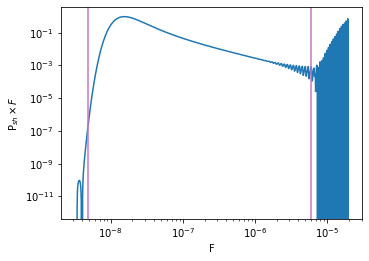

In [34]:
startl = 50
limi = -140
fig, _ = plots.check_psh_plot(flux, pf_vals.real, j=[startl, limi])

# print(pf_vals)

In [35]:
print(f'\mu \int F P1: {(muu[0] * integrate.simps(fluxes * p1_vals, fluxes))}')
print(f' \int F Psh: {integrate.simps(pf_vals[startl:limi].real * flux[startl:limi], flux[startl:limi])}')


\mu \int F P1: 3.5498033637035366e-08
 \int F Psh: 3.415670235022937e-08


In [37]:
pshvals, fxs = pd.psh(params, plot=False, infer_values=True)

Got P1(F) values
inferred log_k_max 9.00000000000002
Finished FT of P1
Finished Psh computation
\mu \int F P1: 3.5498146250168936e-08
 \int F Psh: 3.539573936964183e-08
percent error = -0.29%



 \int F Psh: 3.539099050567654e-08


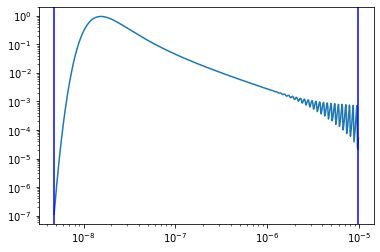

In [38]:
plt.plot(fxs, fxs * pshvals.real)
ax = plt.gca()
startl = 0
limi = -1
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(fxs[startl], color='b')
ax.axvline(fxs[limi], color='b')

print(f' \int F Psh: {integrate.simps(pshvals[startl:limi].real * fxs[startl:limi], fxs[startl:limi])}')



In [3]:
pshop, fluxes, psis = pd.psh_of_psi(p, num_psi=10, infer_values=True)

Angle: 40.0
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 1.4567657862715708e-07
 \int F Psh: 1.455702556514103e-07
percent error = -0.07%

Angle: 55.55555555555556
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 1.0334295916063471e-07
 \int F Psh: 1.0325141698424758e-07
percent error = -0.09%

Angle: 71.11111111111111
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 7.843955303147131e-08
 \int F Psh: 7.834051409579064e-08
percent error = -0.13%

Angle: 86.66666666666666
Got P1(F) values
inferred log_k_max 9.000000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 6.269227745427466e-08
 \int F Psh: 6.260953249925279e-08
percent error = -0.13%

Angle: 102.22222222222223
Got P1(F) values
inferred log_k_max 9.000000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1261efe20>)

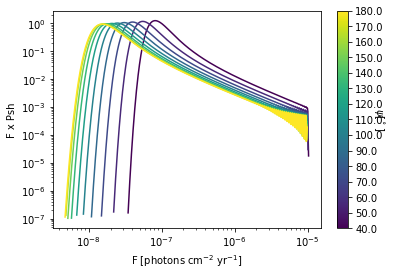

In [4]:
plots.psh_func_psi_plot(pshop, fluxes, psis, outfile='./output/n0_psh_of_psi.png')

In [5]:
importlib.reload(pd)
psh_2dfunc = pd.interp_and_save_psh(p, pshop, fluxes, psis, outfile='./output/n0_pshfunc.npz')

Returned P_sh(\psi, flux)


[Text(1, 0, '40.0'),
 Text(1, 0, '50.0'),
 Text(1, 0, '60.0'),
 Text(1, 0, '70.0'),
 Text(1, 0, '80.0'),
 Text(1, 0, '90.0')]

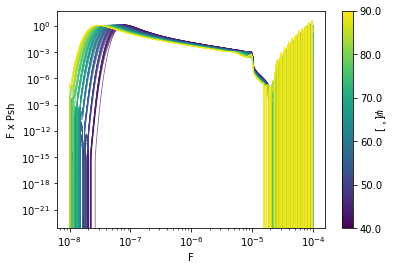

In [16]:
numnum = 100
psis = np.linspace(40, 90, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []
fxs = flux
for psi, col in zip(psis, colors):
    ax.plot(fxs, fxs * psh_2dfunc(psi, fxs).flatten(), label=rf"{psi}$^\circ$", color=col, lw=0.5)
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs)

In [ ]:
def pc()